### BitPredict

Time series problems deal with data over time.

Ex: No of staff over 10-years, sales of computers for the past 5-years

The timeline can be short (s/min) or long (years/decades)

<img src='https://camo.githubusercontent.com/cf5d133477c6ac29e568767d497f5d691cec66673e4c4f9aad013e50eb8e4080/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d6578616d706c652d74696d652d7365726965732d70726f626c656d732e706e67' />

For the forecasting of Bitcoin, the historical data for the past month can be the data and the label could be today's price (cannot be tomorrow's price since that was we'd want to predict).

### import data

In [1]:
import requests
import pandas as pd
url = "http://api.scraperlink.com/investpy/?email=your@email.com&type=historical_data&product=cryptos&symbol=BTC&from_date=10/01/2013&to_date=10/04/2022"

response = requests.request("GET", url)

prices = response.json()['data']
prices

[{'direction_color': 'greenFont',
  'rowDate': 'Oct 04, 2022',
  'rowDateRaw': 1664841600,
  'rowDateTimestamp': '2022-10-04T00:00:00Z',
  'last_close': '20,340.2',
  'last_open': '19,629.7',
  'last_max': '20,436.1',
  'last_min': '19,506.4',
  'volume': '368.17K',
  'volumeRaw': 368172,
  'change_precent': '3.63',
  'last_closeRaw': '20340.17773437500000',
  'last_openRaw': '19629.71875000000000',
  'last_maxRaw': '20436.06250000000000',
  'last_minRaw': '19506.42578125000000',
  'change_precentRaw': 3.626891602518687},
 {'direction_color': 'greenFont',
  'rowDate': 'Oct 03, 2022',
  'rowDateRaw': 1664755200,
  'rowDateTimestamp': '2022-10-03T00:00:00Z',
  'last_close': '19,628.3',
  'last_open': '19,057.6',
  'last_max': '19,676.0',
  'last_min': '19,001.3',
  'volume': '333.03K',
  'volumeRaw': 333028,
  'change_precent': '3.02',
  'last_closeRaw': '19628.28125000000000',
  'last_openRaw': '19057.63476562500000',
  'last_maxRaw': '19676.03515625000000',
  'last_minRaw': '19001.2734

In [2]:
data = pd.DataFrame(prices)
data.head()

,direction_color,rowDate,rowDateRaw,rowDateTimestamp,last_close,last_open,last_max,last_min,volume,volumeRaw,change_precent,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw,change_precentRaw
0,greenFont,"Oct 04, 2022",1664841600,2022-10-04T00:00:00Z,"20,340.2","19,629.7","20,436.1","19,506.4",368.17K,368172,3.63,20340.17773437500000,19629.71875000000000,20436.06250000000000,19506.42578125000000,3.626892
1,greenFont,"Oct 03, 2022",1664755200,2022-10-03T00:00:00Z,"19,628.3","19,057.6","19,676.0","19,001.3",333.03K,333028,3.02,19628.28125000000000,19057.63476562500000,19676.03515625000000,19001.27343750000000,3.023788
2,redFont,"Oct 02, 2022",1664668800,2022-10-02T00:00:00Z,"19,052.2","19,311.9","19,389.9","18,937.3",222.82K,222824,-1.34,19052.18359375000000,19311.94921875000000,19389.89062500000000,18937.32617187500000,-1.344844
3,redFont,"Oct 01, 2022",1664582400,2022-10-01T00:00:00Z,"19,311.9","19,422.9","19,480.3","19,172.6",173.91K,173906,-0.57,19311.89843750000000,19422.89843750000000,19480.29882812500000,19172.61523437500000,-0.572030
4,redFont,"Sep 30, 2022",1664496000,2022-09-30T00:00:00Z,"19,423.0","19,593.4","20,174.9","19,208.9",490.29K,490290,-0.87,19423.00390625000000,19593.38476562500000,20174.87890625000000,19208.85351562500000,-0.867390


Column definitions:
* `last_close`: closing price of the time interval (last price btc trades at before market closes)
* `last_open`: Opening price of the time interval (first price btc trades at when market opens)
* `last_max`: Highest price btc was traded for during time interval
* `last_min`: Lowest price btc was traded for during time interval

In [3]:
# Remove unnecessary columns
data.drop(columns=[
  'direction_color',
  'rowDateRaw',
  'rowDateTimestamp',

  # Quantity of btc bought or sold
  'volume',
  'volumeRaw',
  'change_precent',
  'change_precentRaw',
  'last_close',
  'last_open',
  'last_max',
  'last_min'
  ],
  inplace=True
)

data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,"Oct 04, 2022",20340.17773437500000,19629.71875000000000,20436.06250000000000,19506.42578125000000
1,"Oct 03, 2022",19628.28125000000000,19057.63476562500000,19676.03515625000000,19001.27343750000000
2,"Oct 02, 2022",19052.18359375000000,19311.94921875000000,19389.89062500000000,18937.32617187500000
3,"Oct 01, 2022",19311.89843750000000,19422.89843750000000,19480.29882812500000,19172.61523437500000
4,"Sep 30, 2022",19423.00390625000000,19593.38476562500000,20174.87890625000000,19208.85351562500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rowDate        3291 non-null   object
 1   last_closeRaw  3291 non-null   object
 2   last_openRaw   3291 non-null   object
 3   last_maxRaw    3291 non-null   object
 4   last_minRaw    3291 non-null   object
dtypes: object(5)
memory usage: 128.7+ KB


In [5]:
# Convert date object to datetime
data['rowDate'] = pd.to_datetime(data['rowDate'])

# Convert values to floats
data = data.astype({ 'last_closeRaw': 'float', 'last_openRaw': 'float', 'last_maxRaw': 'float', 'last_minRaw': 'float' })

In [6]:
data.set_index('rowDate', inplace=True)

In [7]:
data.head()

,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
rowDate,,,,
2022-10-04,20340.177734,19629.718750,20436.062500,19506.425781
2022-10-03,19628.281250,19057.634766,19676.035156,19001.273438
2022-10-02,19052.183594,19311.949219,19389.890625,18937.326172
2022-10-01,19311.898438,19422.898438,19480.298828,19172.615234
2022-09-30,19423.003906,19593.384766,20174.878906,19208.853516


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2022-10-04 to 2013-10-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   last_closeRaw  3291 non-null   float64
 1   last_openRaw   3291 non-null   float64
 2   last_maxRaw    3291 non-null   float64
 3   last_minRaw    3291 non-null   float64
dtypes: float64(4)
memory usage: 128.6 KB


In [9]:
len(data)

3291

In time series problems, usually the no. of samples is much less (eventhough the data for 9 years is present its only 3291 rows), which can be an issue since DL algorithms fluorish with lots of data (1000s or even millions)

**Note**: The frequency at which a time series value is collected is often referred to as **seasonality** (no. of samples per year), which is usually measured in no. of samples per year.
* Collecting data once per year would result in a time series with a seasonality of 365.

**Side-note**: time series data collected with different seasonality values often exhibit seasonal patterns
* Ex: electricity demand is higher in summer than winter (AC)

<img src='https://camo.githubusercontent.com/0e163454f6671cdbcd43dd1dabbd191c9e7256e8bbf82ef3076c2169d91eecec/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d74797065732d6f662d74696d652d7365726965732d7061747465726e732e706e67' />

In time series problems there're two types of data:
* Univariate - data deals with one variable (Ex: using price of bitcoin to predict price of bitcoin). Using the target to predict the target.
* Multivariate - data deals with more than one variable (Ex: using price of bitcoin & block rewards size to predict price of bitcoin). Using the target and another time series to predict the target

<img src='https://camo.githubusercontent.com/aa05b7ec4479d147154185a9208da36c24d7379f412f27307af64338a1ffda50/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d756e69766172696174652d616e642d6d756c7469766172696174652d74696d652d7365726965732d646174612e706e67' />

### Data Exploration

In [10]:
bitcoin_prices = pd.DataFrame(data['last_closeRaw']).rename(columns={ 'last_closeRaw': 'Price' })
bitcoin_prices.head()

,Price
rowDate,
2022-10-04,20340.177734
2022-10-03,19628.281250
2022-10-02,19052.183594
2022-10-01,19311.898438
2022-09-30,19423.003906


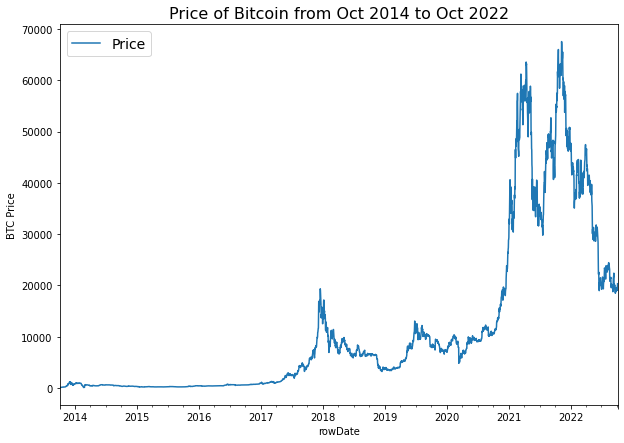

In [11]:
# Visualize closing prices
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from Oct 2014 to Oct 2022', fontsize=16)
plt.legend(fontsize=14);

### Create train & test sets

*Phase 01 - the wrong way*

In [12]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2022-10-04T00:00:00.000000000', '2022-10-03T00:00:00.000000000',
        '2022-10-02T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
        '2022-09-30T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
        '2022-09-28T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
        '2022-09-26T00:00:00.000000000', '2022-09-25T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([20340.17773438, 19628.28125   , 19052.18359375, 19311.8984375 ,
        19423.00390625, 19592.95117188, 19410.95507812, 19080.99609375,
        19225.6796875 , 18803.17382812]))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timesteps,
    prices,
    test_size=.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2632,), (659,), (2632,), (659,))

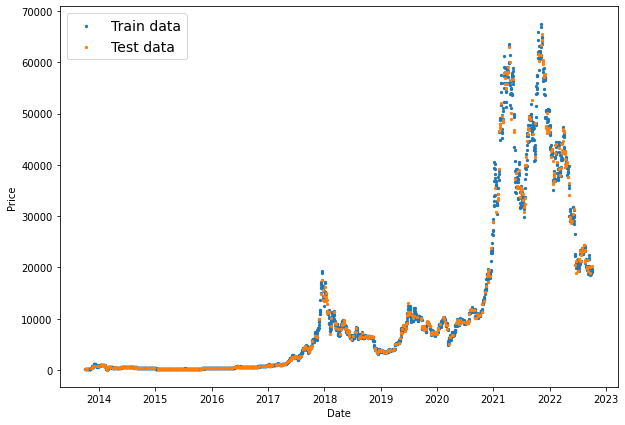

In [15]:
# Plot incorrect data splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(fontsize=14)
plt.show();

This will not work out, since the test and training data are mixed up (data leakage)

The `train_test_split` randomly splits the data, which is fine for a NLP/classification or other regression problems, however things change when a time component is involved

Since forecasting has a time component that must be given most priority. In this case we want to predict the future values of btc prices using the past prices

IOW, for training data the prices up to a specific point must be used and for the test data the prices ahead of the specified point must be used.
* Ex: for training prices from 2013-2020 can be used, for test the prices from 2020-2022 must be used